In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sqlite3
import base64
from tqdm import tqdm_notebook as t
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

from scipy.spatial import Voronoi, voronoi_plot_2d


In [3]:
N = 2687592411512374403

d = {}
for i in os.listdir(str(N)):
    if i[-4:] == ".csv":
        d[i[:-4]] = pd.read_csv(os.path.join(str(N),i))

def dessida(l):
    if type(l) != str:
        return l
    llista = eval(l)
    for dic in llista:
        dic['data'] = base64.b64decode(dic['data'])
    return llista

d['player_state'] = d['player_state'][d['player_state'].posX >= -80000]

N1 = d['game_frame'].events.dropna().index[0]

d['game_frame'] = d['game_frame'].iloc[N1+1:]

d['game_frame'].events = d['game_frame'].events.apply(dessida)

ps = d['player_state']

ps = ps.sort_values("framenumber")

In [4]:
llista_frames = ps.framenumber.unique()

In [5]:
jugadors = ps.playerguid.unique()

posicions = {}
for k in jugadors:
    posicions[k] = (ps.posX[ps.playerguid == k], ps.posY[ps.playerguid == k], ps.posZ[ps.playerguid == k])

ps = d['player_state']

ps = ps.sort_values("framenumber")

def ultim_frame_on_apareix_un_pavo(pavo):
    return ps.framenumber[ps.playerguid == pavo].max()

#Classificacio
classi = sorted([(i, ultim_frame_on_apareix_un_pavo(i)) for i in jugadors], key = lambda x: x[1], reverse = True)
classi

[('Angel_Hahn', 37739),
 ('Christopher_Cox', 37315),
 ('Stacy_Butler', 34503),
 ('Hector_Higgins', 30893),
 ('Pro', 24518),
 ('Sherry_Wong', 18994),
 ('Samantha_Martinez', 18511),
 ('Misty_Jones', 16129),
 ('Michael_Lewis', 15417),
 ('Yvonne_Haas', 13241)]

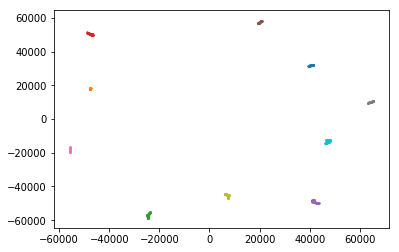

In [6]:
for k in jugadors:
    xs = posicions[k][0][:100]
    ys = posicions[k][1][:100]
    plt.scatter(xs,ys, s = 1)dd

In [12]:
xmax = 78080
xmin = -77940
ymax = 75060
ymin = -75040

dx = xmax-xmin
dy = ymax-ymin

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

from scipy.spatial import Voronoi, voronoi_plot_2d
def f(ii):
    """Generates one frame of the first animation """
    cos30 = 0.86602540378
    centres = [(0,0),(dx/3, 0),(-dx/3, 0.0),(dx/6, cos30*dx/3),(-dx/6, cos30*dx/3),(dx/6, -cos30*dx/3),(-dx/6, -cos30*dx/3)]
    fig, ax = plt.subplots()
    #voronoi_plot_2d(Voronoi(list(zip(xs,ys))))


    # plot
    #regions, vertices = voronoi_finite_polygons_2d(Voronoi(list(zip(xs,ys))))

    # colorize
    patches = []
    # create 3x3 grid to plot the artists

    # add a Polygon
    polygon = mpatches.RegularPolygon((0.0, 0.0), 6, dx/6/cos30)
    patches.append(polygon)

    polygon2 = mpatches.RegularPolygon((dx/3, 0), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon2)

    polygon3 = mpatches.RegularPolygon((-dx/3, 0.0), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon3)

    polygon4 = mpatches.RegularPolygon((dx/6, cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon4)

    polygon5 = mpatches.RegularPolygon((-dx/6, cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon5)

    polygon6 = mpatches.RegularPolygon((dx/6, -cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon6)

    polygon7 = mpatches.RegularPolygon((-dx/6, -cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon7)


    #voronoi_plot_2d(Voronoi(list(zip(xs,ys))), ax = ax, show_vertices = False, point_size = 10)
    colors = np.linspace(0, 0.1, len(patches)+1)
    collection = PatchCollection(patches, alpha=1, cmap = 'gist_gray', lw = 1)
    collection.set_array(np.array([colors[0]]*7))
    collection.set_facecolor('none')
    collection.set_edgecolor([(1,1,1)])

    ax.add_collection(collection)
    for i in centres:
        plt.scatter(i[0],i[1], marker = 'x', s = 0, color = 'black')

        """
    for region in regions:
        polygon = vertices[region]
        plt.fill(*zip(*polygon), alpha=0.4)
    """
    plt.axis('equal')
    plt.axis('off')
    plt.xlim([-xmax,xmax])
    plt.ylim([ymin,ymax])

    plt.tight_layout()

    for k in jugadors:
        xs = posicions[k][0][max(0,ii-1000):ii]
        ys = posicions[k][1][max(0,ii-1000):ii]
        plt.scatter(xs,ys, s = 10)
    
    plt.savefig(str(ii)+".png")

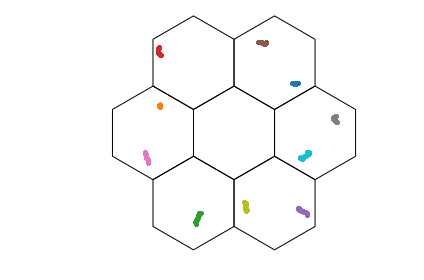

In [11]:
f(200)

In [13]:
"""Auxiliary quaternion algebra """

def q_conjugate(q):
    w, x, y, z = q
    return (w, -x, -y, -z)

def q_mult(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
    z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
    return w, x, y, z

def qv_mult(q1, v1):
    q2 = (0.0,) + v1
    return q_mult(q_mult(q1, q2), q_conjugate(q1))[1:]

In [14]:
def on_esta(pavo, frame):
    aux = ps[(ps.playerguid == pavo) & (ps.framenumber == frame)]
    if len(aux) > 0:
        aux = aux.iloc[0]
    else:
        return [None]*3
    return (aux.posX, aux.posY, aux.posZ)

def a_on_mira(pavo, frame):
    aux = ps[(ps.playerguid == pavo) & (ps.framenumber == frame)]
    if len(aux) > 0:
        aux = aux.iloc[0]
    else:
        return [None]*3
    quaternio = (aux.viewW, aux.viewX, aux.viewY, aux.viewZ)
    return qv_mult(quaternio, (1,0,0))
    

In [17]:
def qui_esta_viu(frame):
    return [i[0] for i in classi if i[1] > frame]

In [18]:
l_pos = []
for r in t(range(len(llista_frames[:5000]))):
    radi = 10000
    jugadors_vius = qui_esta_viu(llista_frames[r]) #Ordre canònic
    #posi = [[posicions[kk][0].iloc[r], posicions[kk][1].iloc[r]] for kk in jugadors_vius]
    on_miren = [a_on_mira(i, llista_frames[r])[0:2] for i in jugadors_vius]
    on_miren = [i/np.linalg.norm(i) if i[0] != None else None for i in on_miren]
    l_pos.append(on_miren)

In [19]:
def ff(ii):
    cos30 = 0.86602540378
    centres = [(0,0),(dx/3, 0),(-dx/3, 0.0),(dx/6, cos30*dx/3),(-dx/6, cos30*dx/3),(dx/6, -cos30*dx/3),(-dx/6, -cos30*dx/3)]
    fig, ax = plt.subplots()
    #voronoi_plot_2d(Voronoi(list(zip(xs,ys))))
    # plot
    #regions, vertices = voronoi_finite_polygons_2d(Voronoi(list(zip(xs,ys))))

    # colorize

    # create 3x3 grid to plot the artists

    # add a Polygon
    polygon = mpatches.RegularPolygon((0.0, 0.0), 6, dx/6/cos30)
    patches.append(polygon)

    polygon2 = mpatches.RegularPolygon((dx/3, 0), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon2)

    polygon3 = mpatches.RegularPolygon((-dx/3, 0.0), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon3)

    polygon4 = mpatches.RegularPolygon((dx/6, cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon4)

    polygon5 = mpatches.RegularPolygon((-dx/6, cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon5)

    polygon6 = mpatches.RegularPolygon((dx/6, -cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon6)

    polygon7 = mpatches.RegularPolygon((-dx/6, -cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon7)


    #voronoi_plot_2d(Voronoi(list(zip(xs,ys))), ax = ax, show_vertices = False, point_size = 10)
    colors = np.linspace(0, 0.1, len(patches)+1)
    collection = PatchCollection(patches, alpha=1, cmap = 'gist_gray', lw = 1)
    collection.set_array(np.array([colors[0]]*7))
    collection.set_facecolor('none')
    collection.set_edgecolor([(1,1,1)])

    ax.add_collection(collection)
    for i in centres:
        plt.scatter(i[0],i[1], marker = 'x', s = 0, color = 'black')

        """
    for region in regions:
        polygon = vertices[region]
        plt.fill(*zip(*polygon), alpha=0.4)
    """
    plt.axis('equal')
    plt.axis('off')
    plt.xlim([-xmax,xmax])
    plt.ylim([ymin,ymax])

    for k in jugadors:
        xs = posicions[k][0][max(0,ii-1000):ii]
        ys = posicions[k][1][max(0,ii-1000):ii]
        plt.scatter(xs,ys, s = 10)
    
    plt.savefig(str(ii)+".png")
    plt.close()

In [20]:
def accl_pos(i,j,k):
    #frame particula eix
    if type(l_pos[i][j]) == type(l_pos[0][0]):
        return l_pos[i][j][k]
    else: 
        return accl_pos(i-1,j,k)

In [22]:
def destinacio(x1,y1,x2,y2, r = 7500*3.14):
    [x2,y2] = [x2,y2]/np.linalg.norm([x2,y2])
    return x1 + r*x2, y1 + r*y2

In [23]:
import math
def rotate_around_point_lowperf(point, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "low performance" version since it's recalculating
    the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
    It's more readable than the next function, though.
    """
    x, y = point
    ox, oy = origin

    qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
    qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

    return qx, qy

In [29]:
def gg(frame):
    cos30 = 0.86602540378
    centres = [(0,0),(dx/3, 0),(-dx/3, 0.0),(dx/6, cos30*dx/3),(-dx/6, cos30*dx/3),(dx/6, -cos30*dx/3),(-dx/6, -cos30*dx/3)]
    fig, ax = plt.subplots()
    #voronoi_plot_2d(Voronoi(list(zip(xs,ys))))
    # plot
    #regions, vertices = voronoi_finite_polygons_2d(Voronoi(list(zip(xs,ys))))

    # colorize
    patches = []
    # create 3x3 grid to plot the artists

    # add a Polygon
    polygon = mpatches.RegularPolygon((0.0, 0.0), 6, dx/6/cos30)
    patches.append(polygon)

    polygon2 = mpatches.RegularPolygon((dx/3, 0), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon2)

    polygon3 = mpatches.RegularPolygon((-dx/3, 0.0), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon3)

    polygon4 = mpatches.RegularPolygon((dx/6, cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon4)

    polygon5 = mpatches.RegularPolygon((-dx/6, cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon5)

    polygon6 = mpatches.RegularPolygon((dx/6, -cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon6)

    polygon7 = mpatches.RegularPolygon((-dx/6, -cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon7)


    #voronoi_plot_2d(Voronoi(list(zip(xs,ys))), ax = ax, show_vertices = False, point_size = 10)
    colors = np.linspace(0, 0.1, len(patches)+1)
    collection = PatchCollection(patches, alpha=1, cmap = 'gist_gray', lw = 1)
    collection.set_array(np.array([colors[0]]*7))
    collection.set_facecolor('none')
    collection.set_edgecolor([(1,1,1)])

    ax.add_collection(collection)
    for i in centres:
        plt.scatter(i[0],i[1], marker = 'x', s = 0, color = 'black')

    """
    for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)
    """
    plt.axis('equal')
    plt.axis('off')
    plt.xlim([-xmax,xmax])
    plt.ylim([ymin,ymax])

    xs = [posicions[k][0].iloc[frame] for k in jugadors]
    ys = [posicions[k][1].iloc[frame] for k in jugadors]
    xss = [accl_pos(frame,i,0) for i in range(len(l_pos[0]))]
    yss = [accl_pos(frame,i,1) for i in range(len(l_pos[0]))]
    for i in range(len(xs)):
        plt.scatter(xs[i], ys[i])
        plt.scatter(xs[i], ys[i], s=3500**1/2, facecolors='none', edgecolors='r')
        x_n, y_n = destinacio(xs[i], ys[i], xss[i], yss[i])
        x_nn, y_nn = rotate_around_point_lowperf((x_n, y_n), 3.14/4, origin = (xs[i], ys[i]))
        x_nnn, y_nnn = rotate_around_point_lowperf((x_n, y_n), -3.14/4, origin = (xs[i], ys[i]))

        #plt.plot([xs[i], x_n], [ys[i], y_n], 'k-', lw=2)
        plt.plot([xs[i], x_nn], [ys[i], y_nn], 'k-', lw=1)
        plt.plot([xs[i], x_nnn], [ys[i], y_nnn], 'k-', lw=1)
    plt.savefig("look"+str(frame)+".png")
    plt.show()
    #plt.close('all')

In [30]:
llista_frames

array([10029, 10031, 10033, ..., 37735, 37737, 37739])

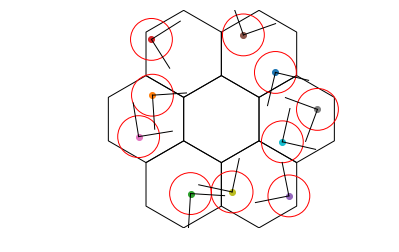

In [31]:
gg(200)

In [32]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.
    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.
    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.
    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

In [33]:
[len(posicions[k][0]) for k in jugadors]

[10283, 16028, 3330, 3669, 9437, 1156, 2115, 10322, 11639, 2693]

In [36]:
xmax = 78080
xmin = -77940
ymax = 75060
ymin = -75040

dx = xmax-xmin
dy = ymax-ymin

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

from scipy.spatial import Voronoi, voronoi_plot_2d

def hh(frame):
    
    """Generates one frame of voronoi diagram"""
    cos30 = 0.86602540378
    centres = [(0,0),(dx/3, 0),(-dx/3, 0.0),(dx/6, cos30*dx/3),(-dx/6, cos30*dx/3),(dx/6, -cos30*dx/3),(-dx/6, -cos30*dx/3)]
    fig, ax = plt.subplots()
    #voronoi_plot_2d(Voronoi(list(zip(xs,ys))))
    jugadors_vius = qui_esta_viu(llista_frames[frame+2])
    
    xs = [posicions[k][0].iloc[frame] for k in jugadors_vius]
    ys = [posicions[k][1].iloc[frame] for k in jugadors_vius]

    
    # plot
    vor = Voronoi(list(zip(xs,ys)))
    regions, vertices = voronoi_finite_polygons_2d(vor)

    # colorize

    # create 3x3 grid to plot the artists
    patches = []

    # add a Polygon
    polygon = mpatches.RegularPolygon((0.0, 0.0), 6, dx/6/cos30)
    patches.append(polygon)

    polygon2 = mpatches.RegularPolygon((dx/3, 0), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon2)

    polygon3 = mpatches.RegularPolygon((-dx/3, 0.0), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon3)

    polygon4 = mpatches.RegularPolygon((dx/6, cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon4)

    polygon5 = mpatches.RegularPolygon((-dx/6, cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon5)

    polygon6 = mpatches.RegularPolygon((dx/6, -cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon6)

    polygon7 = mpatches.RegularPolygon((-dx/6, -cos30*dx/3), 6, dx/6/cos30, alpha = 0)
    patches.append(polygon7)

    voronoi_plot_2d(vor, ax = ax, show_vertices = False, point_size = 10)
    colors = np.linspace(0, 0.1, len(patches)+1)
    collection = PatchCollection(patches, alpha=1, cmap = 'gist_gray', lw = 4)
    collection.set_array(np.array([colors[0]]*7))
    collection.set_facecolor('none')
    collection.set_edgecolor([(1,1,1)])

    ax.add_collection(collection)
    for i in centres:
        plt.scatter(i[0],i[1], marker = 'x', s = 30, color = 'black')


    for region in regions:
        polygon = vertices[region]
        plt.fill(*zip(*polygon), alpha=0.4)

    plt.axis('equal')
    plt.axis('off')
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.savefig("vor"+str(frame)+".png")
    plt.show()
    plt.close('all')

/home/pau/anaconda3/lib/python3.7/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


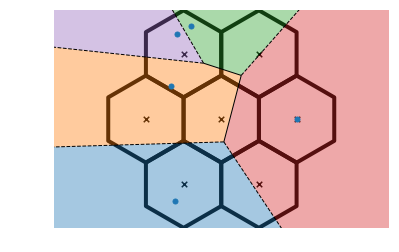

In [37]:
hh(7000)

In [35]:
for i in t(range(1800,7000,10)):
    try:
        hh(i)
    except:
        pass

/home/pau/anaconda3/lib/python3.7/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()
/home/pau/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
